# Internship Project

## By: Harsh Kaushik 

# Classification of Breast Cancer Tumor 

## Importing the libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [7]:
dataset = pd.read_csv('breast_cancer.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [8]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
dataset.shape

(683, 11)

In [10]:
dataset.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

(array([444.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 239.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

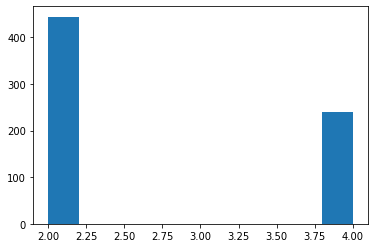

In [13]:
plt.hist(dataset['Class'])

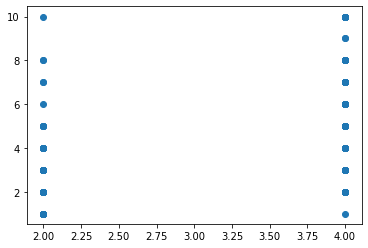

In [15]:
plt.scatter(dataset['Class'],dataset['Single Epithelial Cell Size'])

## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Logistic Regression model on the Training set

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the Test set results

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]]


## Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  3]
 [ 3 47]]


## Computing the accuracy with k-Fold Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X=X_train, y=y_train,cv=10)
print("Accuracy: {:2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:2f} %".format(accuracies.std()*100))

Accuracy: 96.700337 %
Standard Deviation: 1.969798 %
